In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
cmap = plt.cm.Accent
filename = "cavidad+2atomos+bombeo+control+k(n=30).csv"
with open(filename, 'r', encoding='utf-8') as file:
    rows = file.readlines()

In [4]:
# lee la metadata, ie, los parámetros y lo guarda en una lista
parametros = {}
params = [row.strip() for row in rows if row.startswith('#')]
for row in params:
    _,row = row.split('# ')
    if '=' in row:
        key, val = row.split('=')
        if val == 'None':
            parametros[key] = None
        else:
            parametros[key] = float(val)

In [5]:
# lee la data y la convierte a dataframe de pandas
data = [row for row in rows if not row.startswith('#')]
from io import StringIO
df = pd.read_csv(StringIO(''.join(data)))
t = df['t']
N_expect = df['N_expect'].apply(complex)
X_expect = df['X_expect'].apply(complex)
P_expect = df['P_expect'].apply(complex)

# crea la cadena de título
params = [f"{k}={v}" for k, v in parametros.items() if v is not None]
title = ", ".join(params)

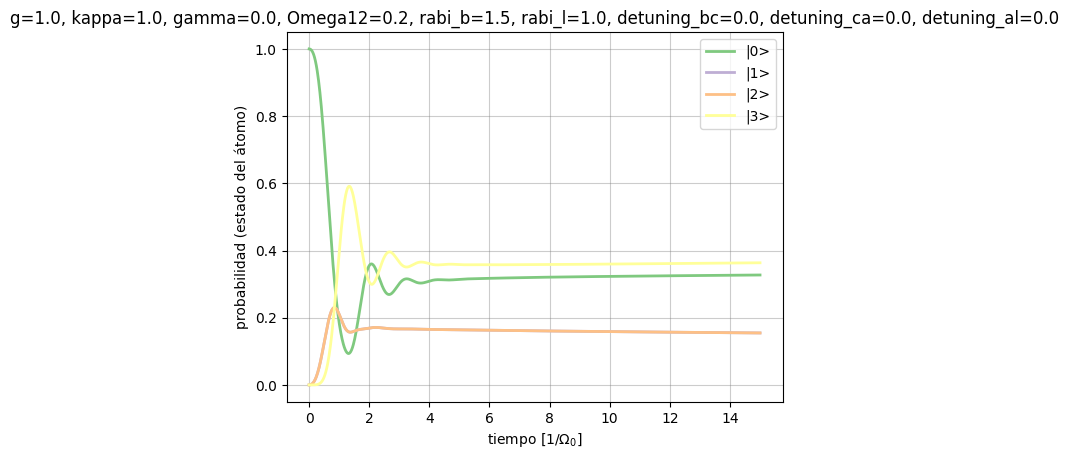

In [7]:
# probabilidades
estados = [0,1,2,3]
for i in estados:
    df[f'estado_{i}'] = df[f'estado_{i}'].apply(complex)
    plt.plot(t, np.real(df[f'estado_{i}']), label=f'|{i}>', color=cmap(i), linewidth=2)
plt.xlabel('tiempo [$1/Ω_0$]')
plt.ylabel('probabilidad (estado del átomo)')
plt.title(title, fontsize=12)
plt.grid(True, color="gray", alpha=0.4)
plt.legend()
plt.show()

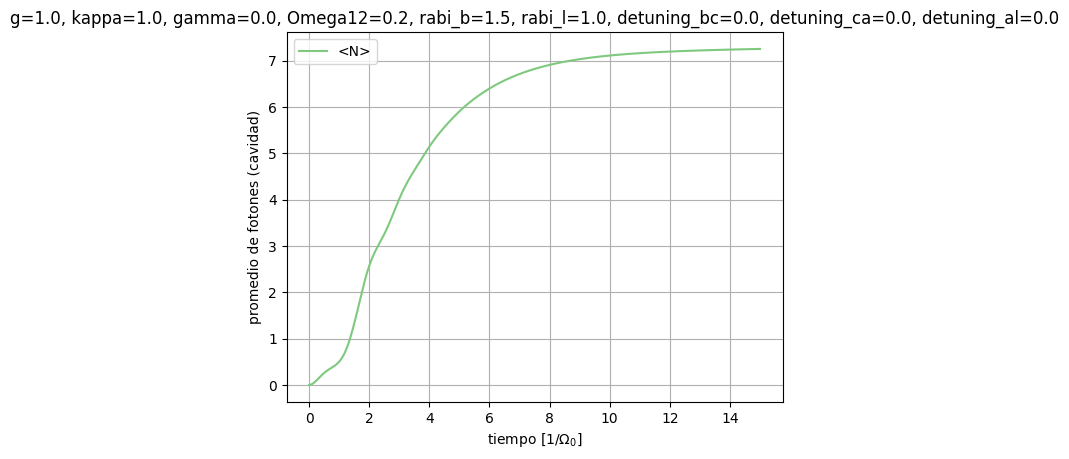

In [8]:
# número esperado de fotones
plt.plot(t, np.real(N_expect), label='<N>', color=cmap(0))
plt.title(title, fontsize=12)
plt.xlabel('tiempo [$1/Ω_0$]')
plt.ylabel('promedio de fotones (cavidad)')
plt.legend()
plt.grid()
plt.show()

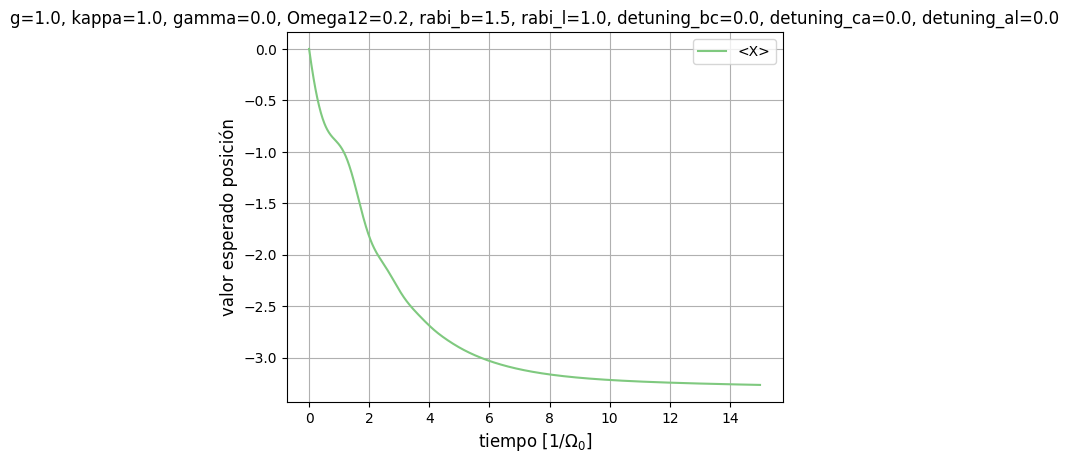

In [9]:
# número esperado de la posición
plt.plot(t, np.real(X_expect), label='<X>', color=cmap(0))
plt.title(title, fontsize=12)
plt.xlabel('tiempo [$1/Ω_0$]', fontsize=12)
plt.ylabel('valor esperado posición', fontsize=12)
plt.legend()
plt.grid()
plt.show()

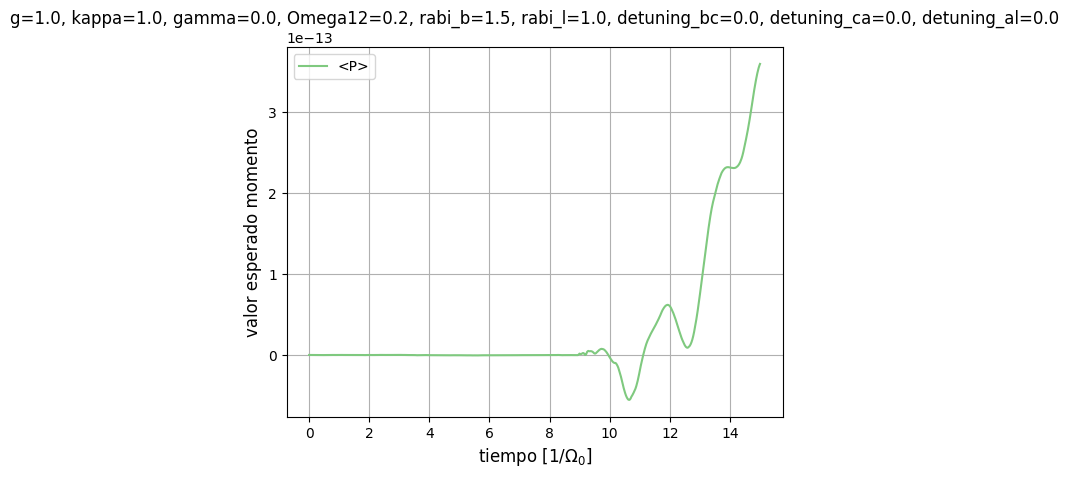

In [10]:
# número esperado del momento
plt.plot(t, np.imag(P_expect), label='<P>', color=cmap(0))
plt.title(title, fontsize=12)
plt.xlabel('tiempo [$1/Ω_0$]', fontsize=12)
plt.ylabel('valor esperado momento', fontsize=12)
plt.legend()
plt.grid()
plt.show()